**Конкурс BigData от Beeline**

https://special.habrahabr.ru/beeline/


_Что имеем_

Анонимизированные данные об абонентах:    
регион, тарифный план, тип тарифного плана,    
информация об объёмах потребления различных услуг оператора и другие.   

В файле train.csv содержится информация для построения модели.  
Формат строк: признаки (x0, ..., x61) и целевая переменная — y.  

_Что делать_  

Построить модель на основе данных из выборки train.csv  

_Как будет проводиться оценка_  

В качестве метрики качества модели будет использоваться Точность (Accuracy) на тестовой выборке.  

---
Александр Куменко _Как я победил в конкурсе BigData от Beeline_    
7 ноября 2015   
https://habr.com/post/270367/

---

In [10]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#%matplotlib inline

In [12]:
df = pd.read_csv('../data/beeline/train.csv.gz') # загружаем данные
len(df)


50000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 63 columns):
x0     49480 non-null object
x1     49500 non-null object
x2     49528 non-null object
x3     49504 non-null object
x4     49514 non-null object
x5     49490 non-null object
x6     50000 non-null int64
x7     50000 non-null int64
x8     48793 non-null float64
x9     47642 non-null object
x10    45063 non-null object
x11    45089 non-null object
x12    45022 non-null object
x13    45512 non-null float64
x14    47638 non-null object
x15    47633 non-null object
x16    47670 non-null object
x17    47650 non-null object
x18    47654 non-null object
x19    47645 non-null object
x20    47661 non-null object
x21    47622 non-null object
x22    47637 non-null object
x23    48122 non-null float64
x24    48122 non-null float64
x25    48122 non-null float64
x26    48122 non-null float64
x27    48122 non-null float64
x28    48122 non-null float64
x29    48122 non-null float64
x30    48122 n

In [14]:
df.describe()

,x6,x7,x8,x13,x23,x24,x25,x26,x27,x28,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
count,50000.00000,50000.000000,48793.000000,45512.000000,48122.000000,48122.000000,48122.000000,48122.000000,48122.000000,48122.000000,...,47844.000000,47844.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,46126.000000,50000.000000
mean,0.99296,0.975860,-0.000252,4428.915253,35.961299,-0.006380,-0.005182,3.652688,0.006831,0.002051,...,-0.000686,-0.003266,0.046325,0.298044,0.286040,0.201557,0.116578,0.051234,161.143910,3.108880
std,0.08361,0.153485,1.023282,10943.884658,6.819859,0.968346,0.947373,3.427215,1.012709,1.012566,...,0.999981,1.000475,0.130912,0.300326,0.291669,0.256582,0.203317,0.139306,186.923802,1.217479
min,0.00000,0.000000,-85.252444,-99.000000,15.226228,-1.310465,-0.817005,0.000000,-0.791959,-0.908422,...,-1.600355,-1.838682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.00000,1.000000,-0.255490,0.000000,30.789115,-0.606190,-0.540656,1.333333,-0.497977,-0.558758,...,-0.697021,-0.731589,0.000000,0.037037,0.035714,0.008065,0.000000,0.000000,37.000000,2.000000
50%,1.00000,1.000000,0.221047,1817.000000,36.597900,-0.239545,-0.223776,2.833333,-0.300303,-0.267042,...,-0.080427,-0.011984,0.000000,0.193182,0.181818,0.086207,0.022727,0.000000,105.000000,3.000000
75%,1.00000,1.000000,0.567620,5582.000000,41.096434,0.284950,0.242333,5.000000,0.133800,0.246062,...,0.624234,0.804853,0.018349,0.500000,0.481013,0.304348,0.129900,0.025157,220.000000,4.000000
max,1.00000,1.000000,3.426844,776759.000000,135.063367,34.899154,38.146887,59.833333,28.814227,32.699880,...,3.473768,2.242850,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5462.000000,6.000000


In [15]:
df.sample(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
13320,3ba9cf2feb,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.740906,7e5c97705a,...,-0.721022,-0.539446,0.0,0.972222,0.027778,0.000000,0.000000,0.0,144.0,2
26218,bfff7d2d9e,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.264369,7b1f0ca4c1,...,0.973310,0.529483,0.0,0.719222,0.235421,0.019438,0.025918,0.0,463.0,3


In [16]:
# числовые поля
df_num =  df.select_dtypes(include=['float','int'])
len(df_num.columns)

44

In [17]:
cols=4
rows=len(df_num.columns)//cols + ((len(df_num.columns)%cols)>0)
xs=20
ys=xs*(rows//cols+1)

In [24]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

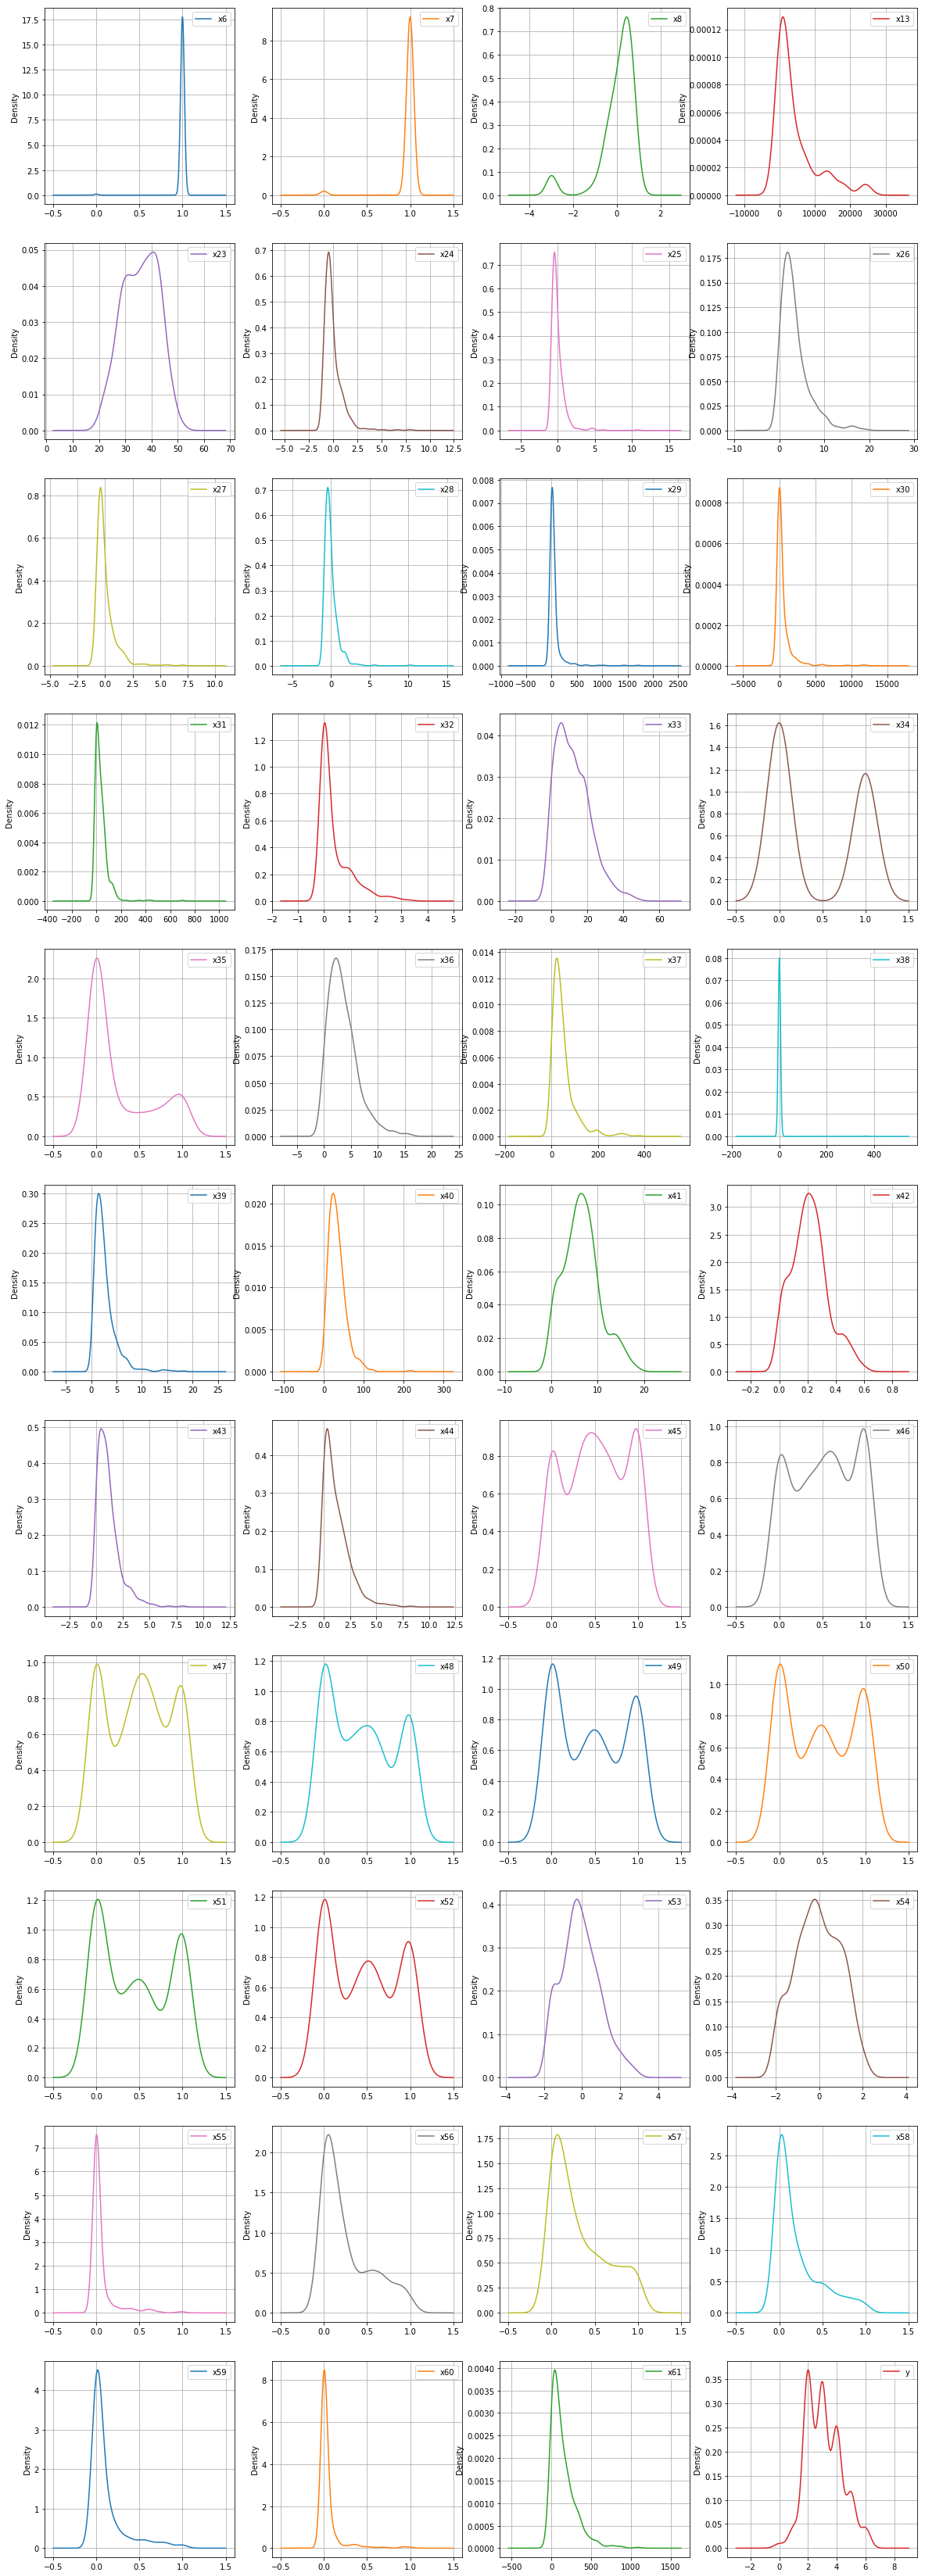

In [25]:
# рисуем плотности признаков
df_num.sample(500).plot.kde(
    subplots=True,
    layout=(rows,cols),
    figsize=(xs,ys),
    sharey=False,
    sharex=False,
    grid=True)

plt.show()

In [26]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 99;

<IPython.core.display.Javascript object>